## <div class="alert alert-block alert-info"> Imports<div>

In [1]:
# My Modules
import wrangle as wr
import explore as ex
import stats_conclude as sc
import evaluate as ev

# Imports
import os

# Numbers
import pandas as pd 
import numpy as np
import scipy.stats as stats

# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split

# Engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

Load in successful, awaiting commands...


## <div class="alert alert-block alert-info"> Wrangle <div>

In [2]:
# getting/creating the csv
df = wr.get_zillow()

CSV file found and loaded


In [3]:
# looking at the data
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,transactiondate,parcelid
0,4.0,3.5,3100.0,1023282.0,6059.0,2017-01-01,14297519
1,2.0,1.0,1465.0,464000.0,6111.0,2017-01-01,17052889
2,3.0,2.0,1243.0,564778.0,6059.0,2017-01-01,14186244
3,4.0,3.0,2376.0,145143.0,6037.0,2017-01-01,12177905
4,4.0,3.0,2962.0,773303.0,6037.0,2017-01-01,12095076


In [4]:
# checking original frame shape
df.shape

(52442, 7)

In [5]:
# looking at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52442 entries, 0 to 52441
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   taxvaluedollarcnt             52441 non-null  float64
 4   fips                          52442 non-null  float64
 5   transactiondate               52442 non-null  object 
 6   parcelid                      52442 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ MB


In [6]:
# looking at numericals
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,parcelid
count,52442.000000,52442.000000,52360.000000,5.244100e+04,52442.000000,5.244200e+04
mean,3.300675,2.299397,1922.874083,5.296830e+05,6049.131917,1.299912e+07
std,0.949086,1.022764,1004.363491,7.518883e+05,21.028933,3.411412e+06
min,0.000000,0.000000,128.000000,1.000000e+03,6037.000000,1.071186e+07
25%,3.000000,2.000000,1268.000000,1.937500e+05,6037.000000,1.151030e+07
50%,3.000000,2.000000,1659.000000,3.736120e+05,6037.000000,1.257766e+07
75%,4.000000,3.000000,2306.000000,6.193010e+05,6059.000000,1.412951e+07
max,14.000000,18.000000,21929.000000,4.906124e+07,6111.000000,1.676878e+08


In [7]:
# identifying potential duplicates
df.nunique()

bedroomcnt                         14
bathroomcnt                        22
calculatedfinishedsquarefeet     4723
taxvaluedollarcnt               38942
fips                                3
transactiondate                   258
parcelid                        52320
dtype: int64

In [8]:
# 52320 unique parcelids?? Supposed to have 52,442...
52442-52320

122

#### So we have duplicated parcel ids... that checks out. You can sell a home more than one time a year. I will drop all duplicates except for the last. In theory, that is my most recent assessment for value.

In [9]:
df[df.parcelid.duplicated()].sort_values(by='parcelid')
# I am going to drop these duplicates, keeping last.. 
# only 122 of them.

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,transactiondate,parcelid
9385,4.0,2.0,1570.0,373282.0,6037.0,2017-07-28,10722858
9307,4.0,2.0,2115.0,115306.0,6037.0,2017-07-25,10732347
1941,4.0,3.0,1804.0,174045.0,6037.0,2017-03-31,10739478
12824,3.0,3.0,2057.0,639607.0,6037.0,2017-08-28,10779619
14328,4.0,4.0,2806.0,708607.0,6037.0,2017-08-30,10811539
...,...,...,...,...,...,...,...
10191,5.0,4.5,3672.0,1123000.0,6111.0,2017-04-14,17193966
22772,4.0,3.0,2717.0,733000.0,6111.0,2017-08-30,17225336
26169,4.0,3.0,1816.0,350701.0,6111.0,2017-06-15,17280166
43478,3.0,2.0,1713.0,498684.0,6111.0,2017-08-25,17282392


In [10]:
df.drop_duplicates(subset=['parcelid'], keep='last', inplace=True)

In [11]:
# checking to confirm drop of duplicates
df.parcelid.duplicated().sum()

0

In [12]:
# additional check
df.shape

(52320, 7)

In [13]:
# check bedroom value counts
df.bedroomcnt.value_counts()

3.0     23303
4.0     15210
2.0      8317
5.0      3967
6.0       634
1.0       611
0.0       135
7.0       106
8.0        24
9.0         8
10.0        2
14.0        1
11.0        1
12.0        1
Name: bedroomcnt, dtype: int64

In [14]:
# nulls
df.isnull().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet    81
taxvaluedollarcnt                1
fips                             0
transactiondate                  0
parcelid                         0
dtype: int64

In [15]:
# checking dates to ensure only 2017 was grabbed
df [df.transactiondate > '2017'] #52441 2018

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,transactiondate,parcelid
0,4.0,3.5,3100.0,1023282.0,6059.0,2017-01-01,14297519
1,2.0,1.0,1465.0,464000.0,6111.0,2017-01-01,17052889
2,3.0,2.0,1243.0,564778.0,6059.0,2017-01-01,14186244
3,4.0,3.0,2376.0,145143.0,6037.0,2017-01-01,12177905
4,4.0,3.0,2962.0,773303.0,6037.0,2017-01-01,12095076
...,...,...,...,...,...,...,...
52437,2.0,2.0,1286.0,354621.0,6037.0,2017-09-20,11000655
52438,4.0,2.0,1612.0,67205.0,6111.0,2017-09-21,17239384
52439,3.0,1.0,1032.0,49546.0,6037.0,2017-09-21,12773139
52440,3.0,2.0,1762.0,522000.0,6037.0,2017-09-25,12826780


In [16]:
# dropping 2018 row
df = df.drop(axis = 0, index = 52441) #loc[[52441]]

In [17]:
# cleaning the data
df_clean = wr.wrangle_zillow(df)
df_clean.head()

Returning Zillow's Single Family Residential Homes from 2017
--------------------------------------------
Renamed columns for ease of use
NaN's removed: Percent Original Data Remaining: 100.0
Bed datatype changed from float to integer
Changed FIPS code to actual county name
--------------------------------------------
County is a categorical column.
Date is a categorical column.
Bed <= 5.5 and > 1.5
Bath <= 4.5 and > 0.5
Sqft <= 3642.5 and > -161.5
Assessed worth <= 1136358.0 and > -387310.0
Outliers removed: Percent Original Data Remaining: 88.0
DataFrame is clean and ready for exploration :)


,bed,bath,sqft,assessed_worth,county,date
0,4,3.5,3100.0,1023282.0,Orange,2017-01-01
1,2,1.0,1465.0,464000.0,Ventura,2017-01-01
2,3,2.0,1243.0,564778.0,Orange,2017-01-01
3,4,3.0,2376.0,145143.0,LA,2017-01-01
4,4,3.0,2962.0,773303.0,LA,2017-01-01


## <div class="alert alert-block alert-info"> Split <div>

In [18]:
train, validate, test = wr.split_zillow(df_clean)

Prepared DF: (45798, 6)
Train: (27478, 6)
Validate: (9160, 6)
Test: (9160, 6)


In [19]:
train.head()

,bed,bath,sqft,assessed_worth,county,date
27950,4,4.0,3359.0,272530.0,Orange,2017-05-31
26677,3,2.0,1096.0,370299.0,LA,2017-05-25
41434,4,2.0,1506.0,520000.0,LA,2017-07-27
9551,4,2.5,1943.0,461740.0,Ventura,2017-03-03
8729,4,3.0,2341.0,284770.0,LA,2017-02-28


## <div class="alert alert-block alert-info"> Explore <div> 
 
Dataframe = Train
    
---
    
**Target = Assessed Worth**
    
---
    
**Goal:** To predict assessed worth of single family residential properties using data from 2017.
    
---
    
**Questions:**
    
1. What is more important for property value, bathrooms or bedrooms?
2. Does the size of the bathrooms affect value?
3. Does having A/C affect property value?
   * Unable to answer this question as during exploration the AC column had over 38,000 nulls
       
    
What kind of linear regression will we use?
    
* Multivariate and simple linear regression

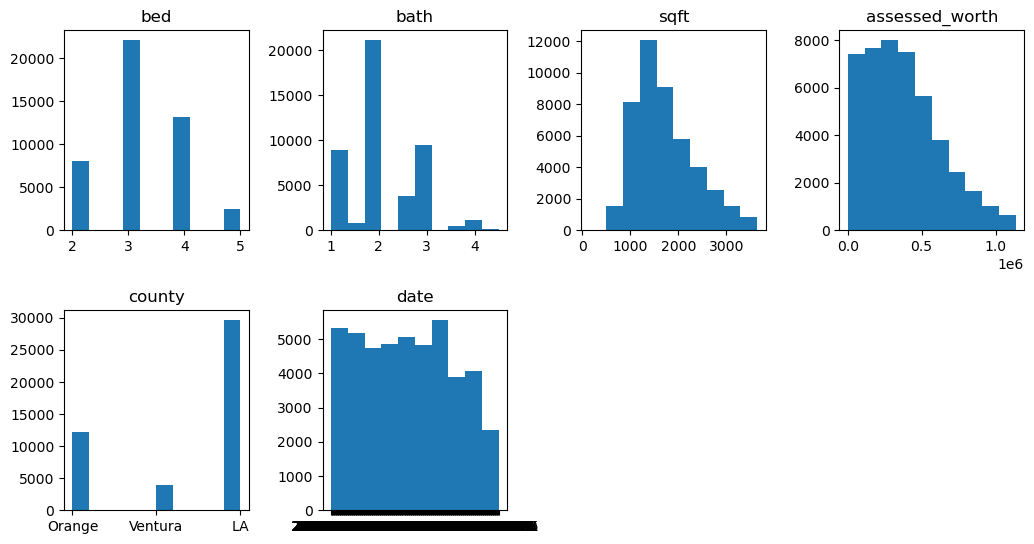

In [20]:
# visualize univariates and distributions
ex.hist_zillow(df_clean)

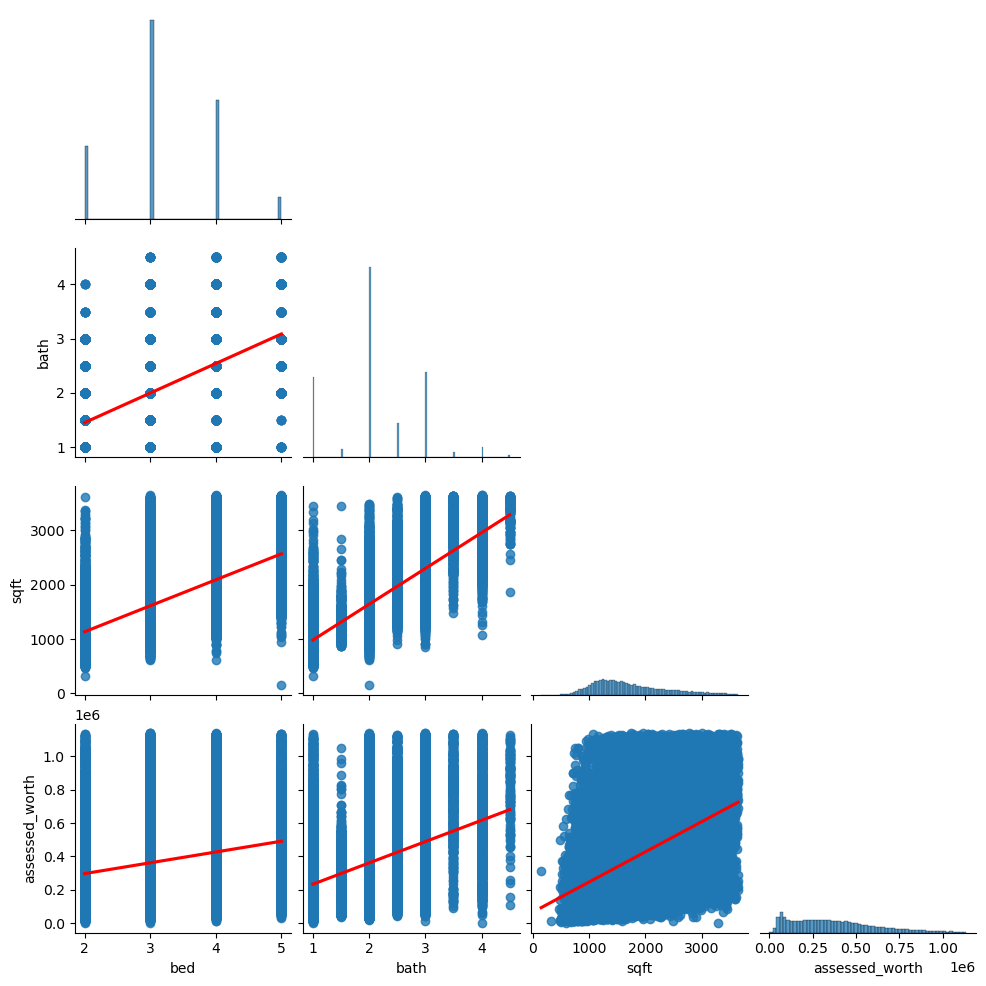

In [21]:
ex.plot_variable_pairs(df_clean)

bed


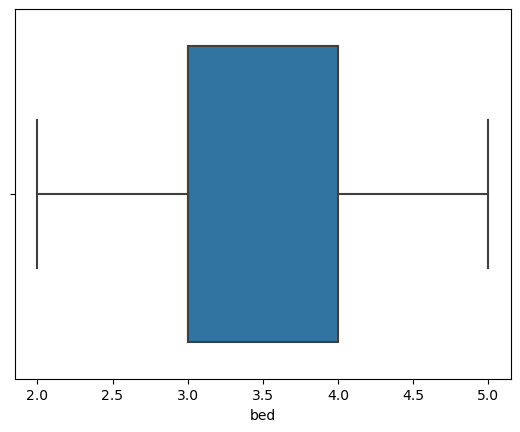

2     8050
3    22108
4    13190
5     2450
Name: bed, dtype: int64

bath


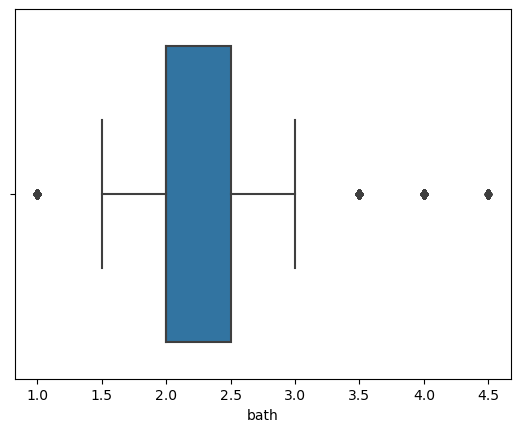

1.0     8879
1.5      830
2.0    21125
2.5     3787
3.0     9440
3.5      510
4.0     1103
4.5      124
Name: bath, dtype: int64

sqft


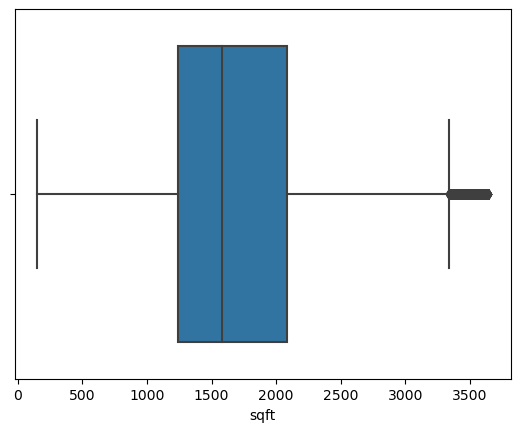

152.0     1
326.0     1
468.0     1
480.0     4
484.0     1
         ..
3638.0    3
3639.0    3
3640.0    2
3641.0    1
3642.0    2
Name: sqft, Length: 2980, dtype: int64



In [22]:
ex.visual_explore_univariate(df_clean)

Categorical Columns
**COUNTY**
LA         29691
Orange     12159
Ventura     3948
Name: county, dtype: int64
LA         65.0
Orange     27.0
Ventura     9.0
Name: county, dtype: float64 2

HYPOTHESIZE
H_0: county does not affect assessed_worth
H_a: county affects assessed_worth

ANALYZE and SUMMARIZE
chi^2 = 76146.7020
p-value = 9.593752748267999e-121 < 0.05
----
We reject the null hypothesis.


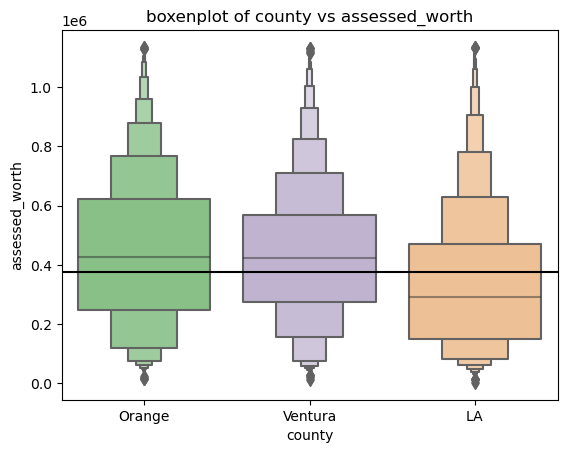

Numerical Columns


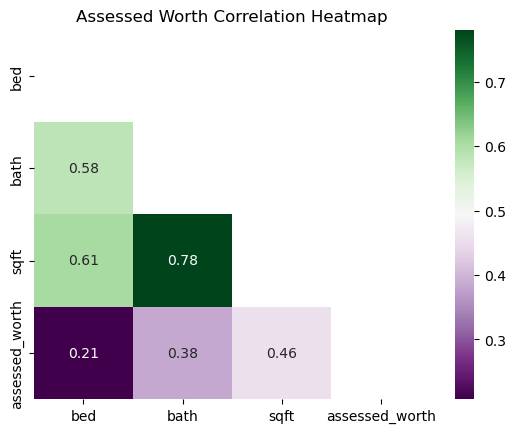

In [23]:
ex.plot_categorical_and_continuous_vars(df_clean.drop(columns=['date']))

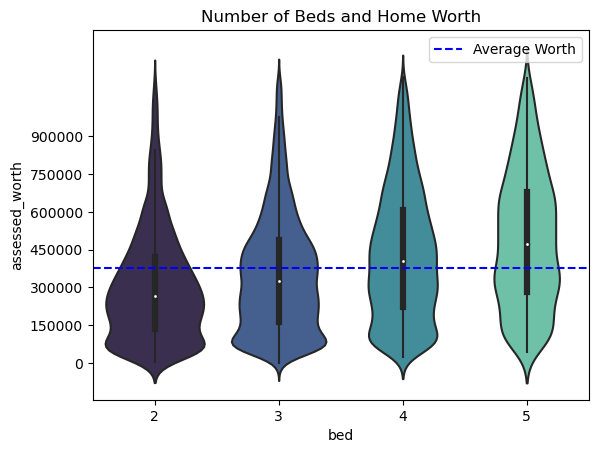

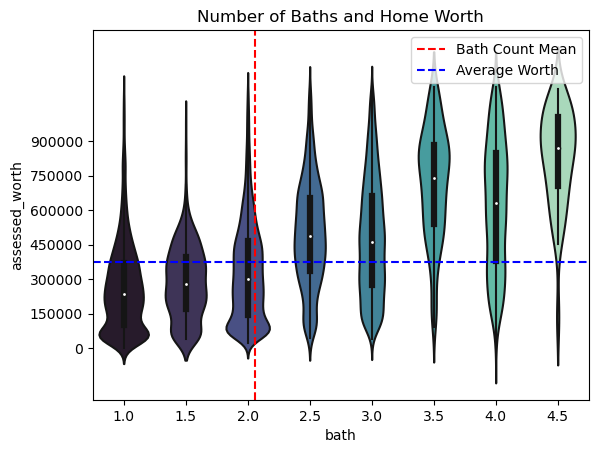

In [24]:
ex.plot_bed_bath(train, 'bed', 'bath')

<div class="alert alert-block alert-info">
    
## Takeaways:

In [25]:
# Relationships:

# there are no 1 bed, 1 bath homes
# there are 5,010 2 bed, 1 bath homes with avg sqft of 998 
# there are 3,649 3 bed, 1 bath homes with avq sqft of 1,167
# there are 213 4 bed, 1 bath homes with avg sqft of 1,582 
# there are 31 5 bed, 1 bath homes with avq sqft of 1,995 

# there are no 1 bed, 1.5 bath homes
# there are 227 2 bed, 1.5 bath homes with avg sqft of 1,189
# there are 502 3 bed, 1.5 bath homes with avg sqft of 1,262
# there are 98 4 bed, 1.5 bath homes with avg sqft of 1,395
# there are 5 5 bed, 1.5 bath homes with avg sqft of 2,068


# there are no 1 bed, 2 bath homes
# there are 2,430 2 bed, 2 bath homes with avg sqft of 1,428 
# there are 13,053 3 bed, 2 bath homes with avq sqft of 1,505 
# there are 5,445 4 bed, 2 bath homes with avg sqft of 1,686 
# there are 327 5 bed, 2 bath homes with acg sqft of 1,944 

# there are no 1 bed, 2.5 bath homes
# there are 186 2 bed, 2.5 bath homes with avg sqft of 1,618
# there are 1,831 3 bed, 2.5 bath homes with avg sqft of 1,927
# there are 1,613 4 bed, 2.5 bath homes with avg sqft of 2,256
# there are 183 5 bed, 2.5 bath homes with avg sqft of 2,394


# there are no 1 bed, 3 bath homes
# there are 240 2 bed, 3 bath homes with avg sqft of 1,989
# there are 2,913 3 bed, 3 bath homes with avg sqft of 2,181 
# there are 5,006 4 bed, 3 bath homes with acg sqft of 2,397
# there are 1,337 5 bed, 3 bath homes with avg sqft of 2,583

# there are no 1 bed, 3.5 bath homes
# there are 11 2 bed, 3.5 bath homes with avg sqft of 2,645
# there are 114 3 bed, 3.5 bath homes with avg sqft of 2,499
# there are 271 4 bed, 3.5 bath homes with avg sqft of 2,895
# there are 99 5 bed, 3.5 bath homes with avg sqft of 2,948


# there are no 1 bed, 4 bath homes
# there are 5 2 bed, 4 bath homes with avg sqft of 2,722
# there are 185 3 bed, 4 bath homes with avg sqft of 2,712
# there are 527 4 bed, 4 bath homes with avg sqft of 2,821
# there are 345 5 bed, 4 bath homes with avg sqft of 2,953

# there are no 1 or 2 bed, 4.5 bath homes
# there are 9 3 bed, 4.5 bath homes with avg sqft of 3,193
# there are 39 4 bed, 4.5 bath homes with avg sqft of 3,122
# there are 48 5 bed, 4.5 bath homes with avg sqft of 3,144

# there are no combinations of bedrooms and 5 and 5.5 bath homes

## <div class="alert alert-block alert-info"> Encode and Scale <div>

In [26]:
# encode
df_encoded = ex.encode_zillow(df_clean)

Encoded County column and renamed encoded columns for readability
DataFrame is encoded and ready for modeling. :)


In [27]:
df_clean

,bed,bath,sqft,assessed_worth,county,date
0,4,3.5,3100.0,1023282.0,Orange,2017-01-01
1,2,1.0,1465.0,464000.0,Ventura,2017-01-01
2,3,2.0,1243.0,564778.0,Orange,2017-01-01
3,4,3.0,2376.0,145143.0,LA,2017-01-01
4,4,3.0,2962.0,773303.0,LA,2017-01-01
...,...,...,...,...,...,...
52436,4,2.0,1633.0,346534.0,LA,2017-09-19
52437,2,2.0,1286.0,354621.0,LA,2017-09-20
52438,4,2.0,1612.0,67205.0,Ventura,2017-09-21
52439,3,1.0,1032.0,49546.0,LA,2017-09-21


In [28]:
ex.encode_zillow(df_clean)

Encoded County column and renamed encoded columns for readability
DataFrame is encoded and ready for modeling. :)


,bed,bath,sqft,assessed_worth,orange,ventura
0,4,3.5,3100.0,1023282.0,1,0
1,2,1.0,1465.0,464000.0,0,1
2,3,2.0,1243.0,564778.0,1,0
3,4,3.0,2376.0,145143.0,0,0
4,4,3.0,2962.0,773303.0,0,0
...,...,...,...,...,...,...
52436,4,2.0,1633.0,346534.0,0,0
52437,2,2.0,1286.0,354621.0,0,0
52438,4,2.0,1612.0,67205.0,0,1
52439,3,1.0,1032.0,49546.0,0,0


In [29]:
# split again after encoding
train_e, validate_e, test_e, = wr.split_zillow(df_encoded)

Prepared DF: (45798, 6)
Train: (27478, 6)
Validate: (9160, 6)
Test: (9160, 6)


In [30]:
# assign
X_train, y_train, X_validate, y_validate, X_test, y_test = \
wr.x_y_train_validate_test(train_e, validate_e, test_e, 'assessed_worth')

Variable assignment successful...
Verifying number of features and target:
Train: ((27478, 5), (27478, 1))
Validate: ((9160, 5), (9160, 1))
Test: ((9160, 5), (9160, 1))


In [31]:
X_train

,bed,bath,sqft,orange,ventura
27950,4,4.0,3359.0,1,0
26677,3,2.0,1096.0,0,0
41434,4,2.0,1506.0,0,0
9551,4,2.5,1943.0,0,1
8729,4,3.0,2341.0,0,0
...,...,...,...,...,...
957,3,3.0,850.0,0,1
35888,3,1.0,1219.0,0,0
1904,3,2.5,1896.0,1,0
37251,4,3.0,2361.0,0,0


In [32]:
# set variable to_scale
to_scale = X_train.columns.tolist()

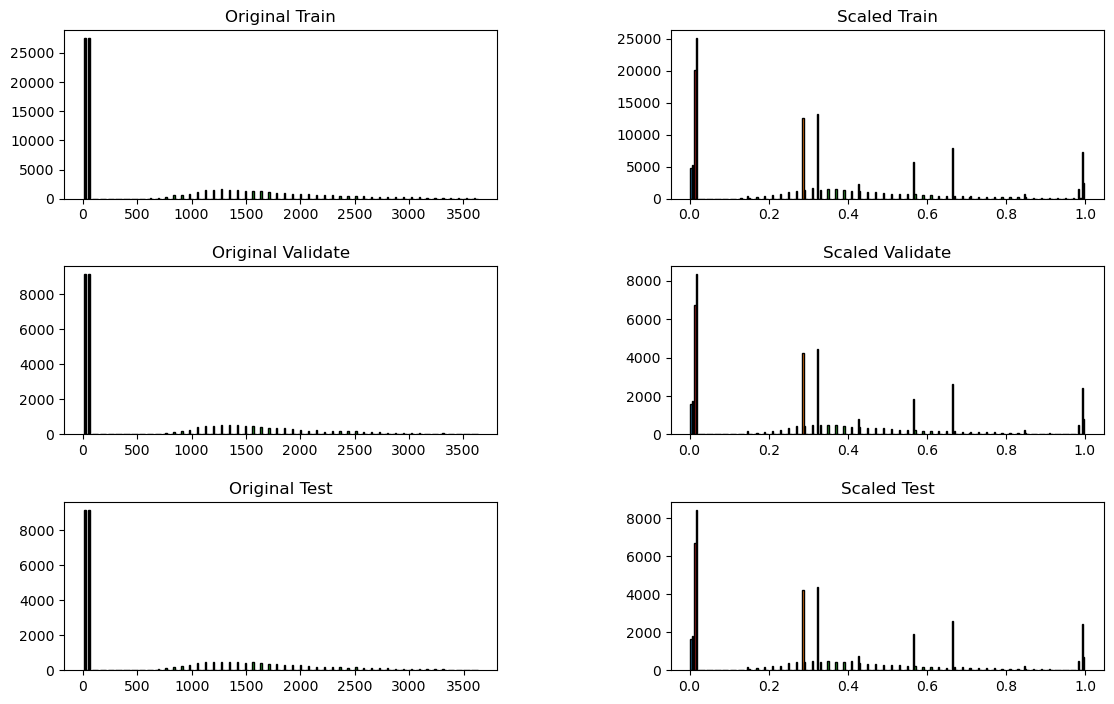

,bed,bath,sqft,orange,ventura
27950,0.666667,0.857143,0.919438,1.0,0.0
26677,0.333333,0.285714,0.270642,0.0,0.0
41434,0.666667,0.285714,0.388188,0.0,0.0
9551,0.666667,0.428571,0.513475,0.0,1.0
8729,0.666667,0.571429,0.627580,0.0,0.0


In [33]:
# scaling the df and making copies
X_train_scaled, X_validate_scaled, X_test_scaled = wr.scale_data(X_train, X_validate, X_test, to_scale)
X_train_scaled.head()

<div class="alert alert-block alert-info">  

## Takeaways:
    
**Questions:**
1. What is more important for property value, bathrooms or bedrooms?
2. Does the size of the bathrooms affect value?
3. Does having A/C affect property value?
   * Unable to answer this question as during exploration the AC column had over 38,000 nulls

    
**Interesting relationships:**
* The correlation. The variable that greatly affects predicatbility of worth is not in this dataset.
    
**Actions for this iteration:**
* Continue with testing

---
    
**What kind of features will I look at engineering?**

* Full and half bath
* Age and Sqft
* Bath and Sqft
* Date split into Month sold, then can bin monthly...?
    
    <div>

## <div class="alert alert-block alert-info"> Stats
**Questions:**
1. What is more important for property value, bathrooms or bedrooms?
2. Does the size of the bathrooms affect value?
3. Does having A/C affect property value?
   * Unable to answer this question as during exploration the AC column had over 38,000 nulls

---
    
**Stats Checklist:**
* Hypothesize
* Visualize
* Analyze (with stats!)
    * discrete - discrete = chi 2
    * discrete - continous = means test
    * continous - continous = correlation
* Summarize <div>

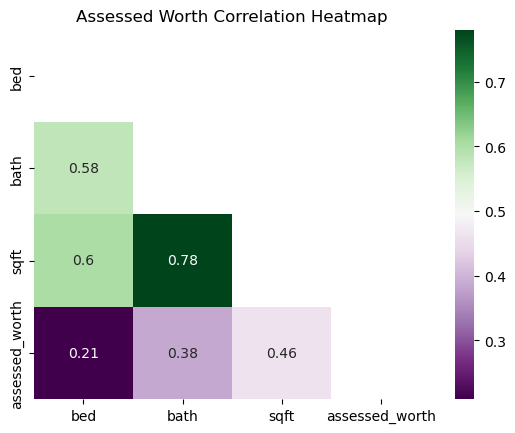

In [43]:
# Correlation
worth_corr = train.corr(method='pearson')
sns.heatmap(train.corr(method='pearson'), cmap='PRGn', annot=True, mask=np.triu(worth_corr))
plt.title(f"Assessed Worth Correlation Heatmap")
plt.show()

<div class="alert alert-block alert-info">
    Questions:
    
* What features contribute to worth the most? Bath Size
    * the least? Bed 
* What are my two most correlated features? Bath and Sqft at .78, Bed and Sqft at .61
* What are my two lease correlated features? Bed and Worth at .21, Bath and worth at .38

---

$H_0$: The mean of bedrooms is <= to the $\mu$ of home value

$H_a$: The mean of bedrooms is > to the $\mu$ of home value

In [ ]:
# Visualize
plt.hist(train.bed)
plt.title(f'Bed Distribution')
plt.show()

In [44]:
# Analyze
# Using one sample, two-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.bed, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -78632558.4065836 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


In [45]:
# Analyze
# Using one sample, right-tailed t-test with assumptions met
sc.conclude_1samp_gt(train.bed, train.assessed_worth.mean())

Assumptions are met: One-Sample, Right-Tailed T-Test successful...
t-stat: -78632558.4065836 > 0?
p-value: 0.0 < 0.05?

----
We fail to reject the null hypothesis.


In [46]:
# Analyze
# Using one sample, left-tailed t-test with assumptions met
sc.conclude_1samp_lt(train.bed, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -78632558.4065836 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


<div class="alert alert-block alert-info">
Bedroom count failed to reject on two tail and right tailed test. Rejected the null on left tailed test. This demonstrates that the less bedrooms a home has, the lower its value is, significantly.
    
Bedroom count does not play a signficant role in a homes value.

---

$H_0$: The mean of bathrooms is <= the $\mu$ of home value

$H_a$: The mean of bathrooms is > the $\mu$ of home value

In [ ]:
# Visualize
plt.hist(train.bath)
plt.title(f'Bath Distribution')
plt.show()

In [48]:
# Analyze
# Using one sample, two-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.bath, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -84074654.35593277 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


In [49]:
# Analyze
# Using one sample, right-tailed t-test with assumptions met
sc.conclude_1samp_gt(train.bath, train.assessed_worth.mean())

Assumptions are met: One-Sample, Right-Tailed T-Test successful...
t-stat: -84074654.35593277 > 0?
p-value: 0.0 < 0.05?

----
We fail to reject the null hypothesis.


In [50]:
# Analyze
# Using one sample, left-tailed, t-test with assumptions met
sc.conclude_1samp_lt(train.bath, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -84074654.35593277 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


<div class="alert alert-block alert-info">
Bathroom count failed to reject on two tail and right tailed test. Rejected the null on left tailed test. This demonstrates that the less bathrooms a home has, the lower its value is, significantly.
    
Number of bathrooms does play a signficant role in a homes value.

---

$H_0$: The mean of sqft is = the $\mu$ of home value

$H_a$: The mean of sqft is != to the $\mu$ of home value

In [ ]:
# Visualize
plt.hist(train.sqft)
plt.title(f'Sqft Distribution')
plt.show()

In [51]:
# Analyze
# Using one sample, two-tailed t-test with assumptions met
sc.conclude_1samp_tt(train.sqft, train.assessed_worth.mean())

Assumptions are met: One-Sample, Two-Tailed T-Test successful...
t-stat: -99301.66573375236 > 0?
p-value: 0.0000000000 < 0.05?

----
We fail to reject the null hypothesis.


In [52]:
# Analyze
# Using one sample, right-tailed t-test with assumptions met
sc.conclude_1samp_gt(train.sqft, train.assessed_worth.mean())

Assumptions are met: One-Sample, Right-Tailed T-Test successful...
t-stat: -99301.66573375236 > 0?
p-value: 0.0 < 0.05?

----
We fail to reject the null hypothesis.


In [53]:
# Analyze
# Using one sample, left-tailed t-test with assumptions met
sc.conclude_1samp_lt(train.sqft, train.assessed_worth.mean())

Assumptions are met: One-Sample, Left-Tailed T-Test successful...
t-stat: -99301.66573375236 < 0?
p-value: 0.0 < 0.05?

----
We can reject the null hypothesis.


---

<div class="alert alert-block alert-info">

Sqft failed to reject on two tail and right tailed test. Rejected the null on left tailed test. This demonstrates that the less bathrooms a home has, the lower its value is, significantly.

Sqft does play a signficant role in a homes value.
    
## Overall, this seems that there is more to the story. All of these features displayed similar characteristics on the one sample test. They may have correlation...
    
Run iterate_columns to look at pearson's r comparisons...

$H_0$: There is no relationship between variables

$H_a$: There is a relationship between variables

In [54]:
sc.iterate_columns(train)

('bed', 'bath')
corr: 0.58 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bed', 'sqft')
corr: 0.60 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bed', 'assessed_worth')
corr: 0.21 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bath', 'sqft')
corr: 0.78 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bath', 'assessed_worth')
corr: 0.38 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('sqft', 'assessed_worth')
corr: 0.46 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bed', 'bath', 'sqft')
corr: 0.58 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bed', 'bath', 'assessed_worth')
corr: 0.58 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.

('bed', 'sqft', 'assessed_worth')
corr: 0.60 > 0?
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesi

<div class="alert alert-block alert-info"> 
    
### Takeaways:
    
Overall:
* All features are fairly closely related.
* Pearson's R Correlation Test rejected the null in all combos.
    
Highest Corr:
* Bath, Sqft, Worth
    * .78 
* The size of the bath is a feature worth engineering.
    
Lowest Corr:
* Bed and Worth
    * .21

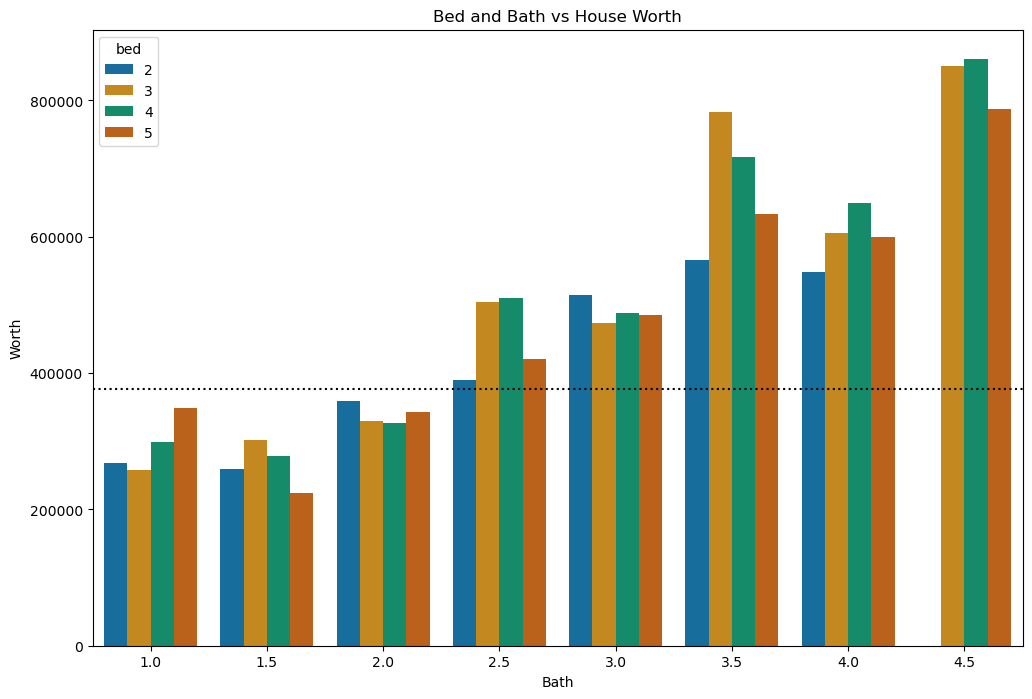

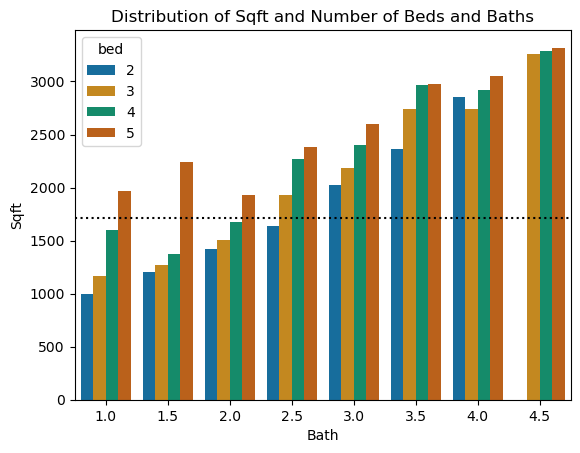

In [64]:
ex.plot_variables(train, 'bed', 'bath')

<div class="alert alert-block alert-info"> 
    
### Takeaways:
* 2.5 baths with 4 and 5 beds is higher worth
* The jump from 3 to 3.5 baths is significant with 3 beds
    
* 3 baths presents most equal distribution for number of beds and baths
    
* Confirms the need to engineer features - but first, identify the top one

### <div class="alert alert-block alert-info"> Feature Engineering:
    
Goal: To identify top features.
    
1) Use SelectKBest for top feature
2) Use RFE for top feature
3) Compare
    * Sqft was determined for both to be the best feature which supports all statistic and visuals prior to running these algorithms
   

In [65]:
# Select KBEST
ev.select_kbest(X_train_scaled, y_train, 1)

These are the top 1 columns selected from Select K Best model:


['sqft']

In [66]:
# RFE
ev.rfe(X_train_scaled, y_train, 1)

These are the top 1 columns selected from RFE model:


['sqft']

<div class="alert alert-block alert-info">

### Takeaways:
    
Sqft was determined for both to be the best feature which supports all statistic and visuals prior to running these algorithms

## <div class="alert alert-block alert-info"> Regression Model:
    
#### Goal: Run 4 types of models, select the best, and beat the baseline using test dataset
    
1. OLS
2. LassoLars
3. GLM (TweedieRegressor)
4. Polynomial Regression
    


In [35]:
X_train_scaled.head()

,bed,bath,sqft,orange,ventura
27950,0.666667,0.857143,0.919438,1.0,0.0
26677,0.333333,0.285714,0.270642,0.0,0.0
41434,0.666667,0.285714,0.388188,0.0,0.0
9551,0.666667,0.428571,0.513475,0.0,1.0
8729,0.666667,0.571429,0.627580,0.0,0.0


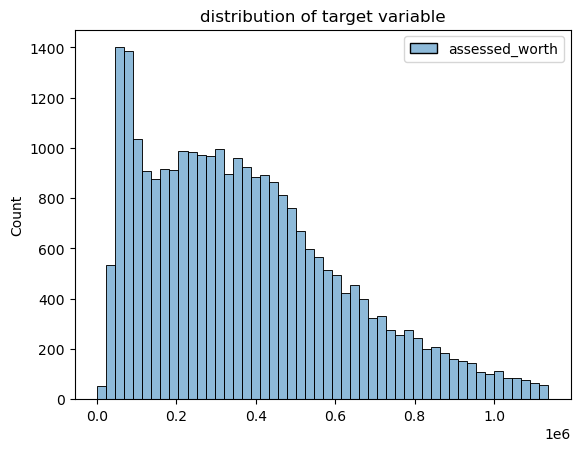

In [36]:
sns.histplot(y_train)
plt.title('distribution of target variable')
plt.show()

In [38]:
# baseline
baseline = y_train.mean().round(2)
baseline

assessed_worth    376100.94
dtype: float64

In [39]:
# make array
baseline_array = np.repeat(baseline, len(X_train_scaled))
baseline_array

assessed_worth    376100.94
assessed_worth    376100.94
assessed_worth    376100.94
assessed_worth    376100.94
assessed_worth    376100.94
                    ...    
assessed_worth    376100.94
assessed_worth    376100.94
assessed_worth    376100.94
assessed_worth    376100.94
assessed_worth    376100.94
Length: 27478, dtype: float64

In [40]:
# evaluate
rmse, r2 = ev.metrics_reg(y_train, baseline_array)
rmse, r2

(246177.8146893768, -4.440892098500626e-16)

In [41]:
# put baseline prediction into metrics df
metrics_df = pd.DataFrame(data=[
    {
        'Model':'Baseline',
        'RMSE':rmse,
        'R2':r2
    }
    
])
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16


In [42]:
#intial ML model
lr1 = LinearRegression()

#make it
rfe = RFE(lr1, n_features_to_select=1)

#fit it
rfe.fit(X_train_scaled, y_train)

#use it on train
X_train_rfe = rfe.transform(X_train_scaled)

#use it on validate
X_val_rfe = rfe.transform(X_validate_scaled)

In [43]:
print('selected top feature:', rfe.get_feature_names_out())


selected top feature: ['sqft']


In [44]:
# build model from top feature
# fit the thing
lr1.fit(X_train_rfe, y_train)

#use the thing (make predictions)
pred_lr1 = lr1.predict(X_train_rfe)
pred_val_lr1 = lr1.predict(X_val_rfe)

In [56]:
# look at preds
pred_lr1[:5]

array([[674153.08683889],
       [263597.52825889],
       [337980.10847002],
       [417261.05371946],
       [489466.58280246]])

In [46]:
# evaluate train
ev.metrics_reg(y_train, pred_lr1)

(218514.65106499006, 0.21211415556717272)

In [58]:
# evaluate validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_lr1)
rmse, r2

(218945.43998673183, 0.20832510092002166)

In [49]:
#add to my metrics df
metrics_df.loc[1] = ['OLS_1', rmse, r2]
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01


In [52]:
# examine the model
lr1.intercept_, lr1.coef_

(array([92336.17284593]), array([[632796.19457669]]))

In [59]:
# OLS
#make it
lr2 = LinearRegression()

#fit it on our RFE features
lr2.fit(X_train_scaled, y_train)

#use it (make predictions)
pred_lr2 = lr2.predict(X_train_scaled)

#use it on validate
pred_val_lr2 = lr2.predict(X_validate_scaled)

In [60]:
# predictions
pred_lr2[:5]

array([[730443.68216663],
       [251769.10434181],
       [283165.67740156],
       [423116.23297584],
       [459955.01303723]])

In [63]:
#train 
ev.metrics_reg(y_train, pred_lr2)

#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_lr2)
rmse, r2

(215313.32006255494, 0.23437366775353607)

In [64]:
#add to my metrics df
metrics_df.loc[2] = ['OLS', rmse, r2]
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01
2,OLS,215313.320063,2.343737e-01


In [70]:
# LASSO LARS
#make it
lars = LassoLars(alpha=1)

#fit it
lars.fit(X_train_scaled, y_train)

#use it
pred_lars = lars.predict(X_train_scaled)
pred_val_lars = lars.predict(X_validate_scaled)

In [71]:
# look at the features
pd.Series(lars.coef_, index=lars.feature_names_in_)

bed       -120950.253259
bath       102335.378645
sqft       613846.753587
orange      60993.969269
ventura     47366.379051
dtype: float64

In [72]:
#train
ev.metrics_reg(y_train, pred_lars)

(215241.95182485148, 0.23553779478727366)

In [73]:
#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_lars)
rmse, r2

(215314.00309833675, 0.23436881017194522)

In [74]:
#add to my metrics df
metrics_df.loc[3] = ['LARS', rmse, r2]
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01
2,OLS,215313.320063,2.343737e-01
3,LARS,215314.003098,2.343688e-01


In [75]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled
X_validate_degree = pf.transform(X_validate_scaled)


In [76]:
#make it
pr = LinearRegression()

#fit it
pr.fit(X_train_degree, y_train)

#use it
pred_pr = pr.predict(X_train_degree)
pred_val_pr = pr.predict(X_validate_degree)

In [77]:
#train
ev.metrics_reg(y_train, pred_pr)

(214225.01950241742, 0.24274428824141525)

In [78]:
#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_pr)
rmse, r2

(214252.089009925, 0.24190226939577641)

In [79]:
#add to my metrics df
metrics_df.loc[4] = ['POLY_2', rmse, r2]
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01
2,OLS,215313.320063,2.343737e-01
3,LARS,215314.003098,2.343688e-01
4,POLY_2,214252.089010,2.419023e-01


In [80]:
#make it
glm = TweedieRegressor(power=1, alpha=1)

#fit it
glm.fit(X_train_scaled, y_train)

#use it
pred_glm = glm.predict(X_train_scaled)
pred_val_glm = glm.predict(X_validate_scaled)

In [81]:
#train
ev.metrics_reg(y_train, pred_glm)

(214867.24314457594, 0.23819713962854205)

In [82]:
#validate
rmse, r2 = ev.metrics_reg(y_validate, pred_val_glm)
rmse, r2

(214938.59276294743, 0.23703631239853795)

In [83]:
# add it to metrics_df
metrics_df.loc[5] = ['GLM',rmse,r2]
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01
2,OLS,215313.320063,2.343737e-01
3,LARS,215314.003098,2.343688e-01
4,POLY_2,214252.089010,2.419023e-01
5,GLM,214938.592763,2.370363e-01


In [99]:
# transform X_test_scaled
X_test_degree = pf.transform(X_test_scaled)


In [100]:
#make it
pr = LinearRegression()

#fit it
pr.fit(X_train_degree, y_train)

#use it
pred_test_pr = pr.predict(X_test_degree)

In [101]:
#validate
rmse, r2 = ev.metrics_reg(y_test, pred_test_pr)
rmse, r2

(220399.52952540023, 0.23020036052650017)

In [102]:
# add it to metrics_df
metrics_df.loc[5] = ['POLY_2_TEST',rmse,r2]
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01
2,OLS,215313.320063,2.343737e-01
3,LARS,215314.003098,2.343688e-01
4,POLY_2,214252.089010,2.419023e-01
5,POLY_2_TEST,220399.529525,2.302004e-01


<div class="alert alert-block alert-info"> 
    
# Evaluate
    
Selecting POLY_2 as the best model to use based on performance for the validate set.
    
It did not perform very well on the test data, but, it did beat baseline RMSE and R2!

### Regression Metrics

#### Vocabulary

Residual: error (change in actual and predicted) <br>
SSE: sum of squared error<br>
MSE: mean squared error<br>
RMSE: root mean squared error<br>

### Residual Error

In [103]:
X_train.head()

,bed,bath,sqft,orange,ventura
27950,4,4.0,3359.0,1,0
26677,3,2.0,1096.0,0,0
41434,4,2.0,1506.0,0,0
9551,4,2.5,1943.0,0,1
8729,4,3.0,2341.0,0,0


In [105]:
# residual = actual - predicted
X_train['baseline_residual'] = y_train - baseline
X_train.head()

,bed,bath,sqft,orange,ventura,baseline_residual
27950,4,4.0,3359.0,1,0,-103570.94
26677,3,2.0,1096.0,0,0,-5801.94
41434,4,2.0,1506.0,0,0,143899.06
9551,4,2.5,1943.0,0,1,85639.06
8729,4,3.0,2341.0,0,0,-91330.94


In [106]:
# residual = actual - predicted
X_train['residuals'] = y_train - pred_lr1 #yhat
X_train.head()

,bed,bath,sqft,orange,ventura,baseline_residual,residuals
27950,4,4.0,3359.0,1,0,-103570.94,-401623.086839
26677,3,2.0,1096.0,0,0,-5801.94,106701.471741
41434,4,2.0,1506.0,0,0,143899.06,182019.891530
9551,4,2.5,1943.0,0,1,85639.06,44478.946281
8729,4,3.0,2341.0,0,0,-91330.94,-204696.582802


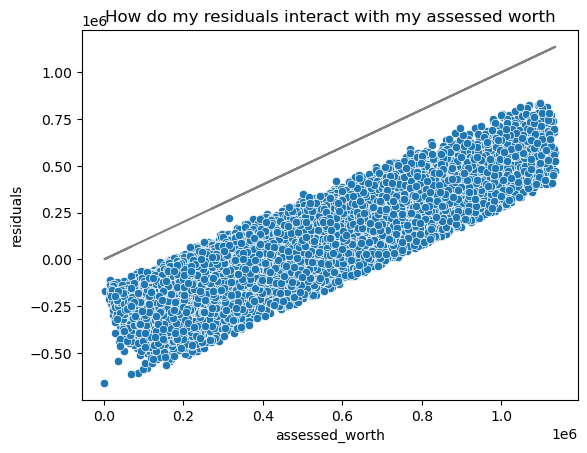

In [108]:
# plotting the residuals
sns.scatterplot(data=X_train, y='residuals', x=y_train.assessed_worth)
plt.plot(y_train, y_train, label='_nolegend_', color='grey')
plt.title('How do my residuals interact with my assessed worth')
plt.show()

### SSE

In [109]:
# add the residuals together
SSE_baseline = np.absolute(X_train['baseline_residual'] ** 2).sum()
SSE = (X_train.residuals **2).sum()
print("SSE baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE baseline = 1665263424882226.0
SSE = 1312037479716434.0


### MSE

In [110]:
from sklearn.metrics import mean_squared_error
# shorthand
MSE = mean_squared_error(y_train, pred_lr1)
MSE

47748652730.05437

In [111]:
# shorthand
# dollars squared
SSE = MSE * len(X_train)
SSE

1312037479716434.0

### RMSE

In [112]:
# shorthand
# How much error we have in one housing price!
RMSE = MSE ** .5
RMSE.round(2)

218514.65

In [123]:
# testing against baseline
MSE_baseline = mean_squared_error(y_train, baseline_array)
MSE_baseline

60603516445.23714

In [124]:
# testing against baseline
SSE_baseline = MSE_baseline * len(X_train)
SSE_baseline

1665263424882226.0

In [125]:
# testing against baseline
RMSE_baseline = MSE_baseline ** .5
RMSE_baseline.round(2)

246177.81

### Variance

In [126]:
metrics_df

,Model,RMSE,R2
0,Baseline,246177.814689,-4.440892e-16
1,OLS_1,218945.439987,2.083251e-01
2,OLS,215313.320063,2.343737e-01
3,LARS,215314.003098,2.343688e-01
4,POLY_2,214252.089010,2.419023e-01
5,POLY_2_TEST,220399.529525,2.302004e-01


### R2

In [127]:
# use r2_score
round(r2_score(y_train, pred_lr1),4)

0.2121

### Is my model better than the baseline model?

My model is better than baseline, however, it's not that great.

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

### Python Code

In [128]:
ev.better_than_baseline(SSE, SSE_baseline)

True

<div class="alert alert-block alert-info"> 

# Conclusion:
    
* Beat Baseline - barely!
    * Used the Polynomial Regression (with 3 degrees)
* Sent in the most basic features that ended up all being correlated therefore producing a low R2 score and resulting in fairly high variance.
    
* Next steps
    
## Feature Engineering:
    
1. Sqft associated Bath and Bed size
2. bed + bath = room_count <br>
3. total_sqft -200 * bedroooms - 40 * bathrooms = living_area "estimating sqft per room based or total_sqft" 
4. Year binned into likely styles of the home .. mid-century, ranch, etc.
5. Continous to Categorical - Quantization to Discretization (worth of house could be binned to low wealth, medium wealth, and high wealth.)
